In [71]:
import sys
import csv
sys.path.append("..")

import os
import argparse
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Function
from torchvision import models

import glob

import re 

import errno
import imageio

from PIL import Image
from torch.utils import data
import torch.nn.functional as F
import torch.nn as nn

In [72]:
# Dice Jaccard HD ASD

path = '/home/xmc/Desktop/w8_output_mismatch.csv'
with open(path, mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        mydict = {rows[0]:rows[1] for rows in reader}

path2 = '/home/xmc/Desktop/w8_output_uamt.csv'
with open(path2, mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new2.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        mydict2 = {rows[0]:rows[1] for rows in reader}

In [73]:
mydict.get('Mismatch_unlabel_c5.0_l1_t0.0_i1000')
# mydict2.get('Mismatch_unlabel_c5.0_l1_t0.0_i1000')

'[ 0.09160747  0.06707236 34.12350288 14.33184727]'

In [74]:
# ablation on dilation:
iteration = 'i3000'

l2_mismatch = {}
l2_uamt = {}

l4_mismatch = {}
l4_uamt = {}

l8_mismatch = {}
l8_uamt = {}

for key, value in mydict.items():
    if 'l2' in key and iteration in key:
        c_no = float(key.split('_')[2][1:])
        l2_mismatch[c_no] = value
    elif 'l4' in key and iteration in key:
        c_no = float(key.split('_')[2][1:])
        l4_mismatch[c_no] = value
    elif 'l8' in key and iteration in key:
        c_no = float(key.split('_')[2][1:])
        l8_mismatch[c_no] = value
        
        
for key, value in mydict2.items():
    if 'l2' in key and iteration in key:
        c_no = float(key.split('_')[2][1:])
        l2_uamt[c_no] = value
    elif 'l4' in key and iteration in key:
        c_no = float(key.split('_')[2][1:])
        l4_uamt[c_no] = value
    elif 'l8' in key and iteration in key:
        c_no = float(key.split('_')[2][1:])
        l8_uamt[c_no] = value

In [75]:
l2_mismatch

{1.0: '[ 0.73630505  0.59256114 29.74608574  9.29085036]',
 5.0: '[ 0.73087182  0.59855046 23.07576438  6.50847777]',
 0.1: '[ 0.69811483  0.55448871 29.00191699  9.42256671]',
 0.01: '[ 0.6912592   0.54286563 31.8419493  10.96056116]',
 0.001: '[ 0.68142575  0.52996266 31.86748164 10.81731365]',
 10.0: '[ 0.65671748  0.51399074 29.80382211  8.94555376]',
 2.0: '[ 0.71486972  0.56934847 30.0499912  10.03287077]'}

In [76]:
l2_uamt

{2.0: '[ 0.74158257  0.6046148  33.6857099  10.11813251]',
 0.01: '[ 0.70222373  0.55954723 37.25577437 12.77712137]',
 0.1: '[ 0.69931909  0.55852935 35.45199409 11.54994666]',
 0.001: '[ 0.65646231  0.50792888 40.95808825 14.31863844]',
 5.0: '[ 0.73256047  0.58984316 30.63817188  9.24016689]',
 10.0: '[ 0.73991435  0.60135144 33.73320159 10.35790892]',
 1.0: '[ 0.72088198  0.57463411 34.99141574 11.25306286]'}

In [77]:
l8_mismatch

{2.0: '[ 0.83671234  0.72401209 15.86491757  4.14265023]',
 0.001: '[ 0.82543748  0.71007903 15.17459049  4.25084249]',
 10.0: '[ 0.79261642  0.66576501 22.74227769  6.31542134]',
 0.1: '[ 0.83766488  0.72839743 14.73443221  4.17471604]',
 0.01: '[ 0.82367137  0.70560507 16.64093503  4.52126781]',
 1.0: '[ 0.83576466  0.72300186 13.57964183  3.78410387]',
 5.0: '[ 0.82124546  0.70323968 17.33002862  4.73542403]'}

In [78]:
l8_uamt

{2.0: '[ 0.8426089   0.73303187 18.68135862  5.33241419]',
 10.0: '[ 0.84394534  0.73427596 13.95543206  4.02482034]',
 0.01: '[ 0.79221515  0.66545488 22.46440677  6.36845912]',
 0.1: '[ 0.81744321  0.70140492 15.63297451  4.4905864 ]',
 5.0: '[ 0.84779844  0.74008428 14.1490892   4.40639552]',
 0.001: '[ 0.83618334  0.72454132 20.58162665  5.6534995 ]',
 1.0: '[ 0.82895032  0.71485921 19.46458919  5.6791466 ]'}

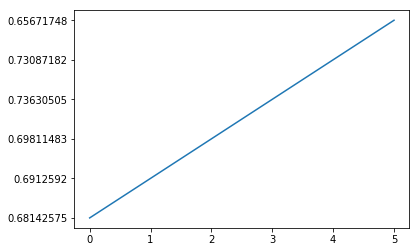

In [79]:
metric_index = 0
metrics = []

for i, c in enumerate([0.001, 0.01, 0.1, 1.0, 5.0, 10.0]):
    current = re.findall("\d+\.\d+", l2_mismatch.get(c))
    metrics.append(current[metric_index])

plt.plot(metrics)
plt.show()

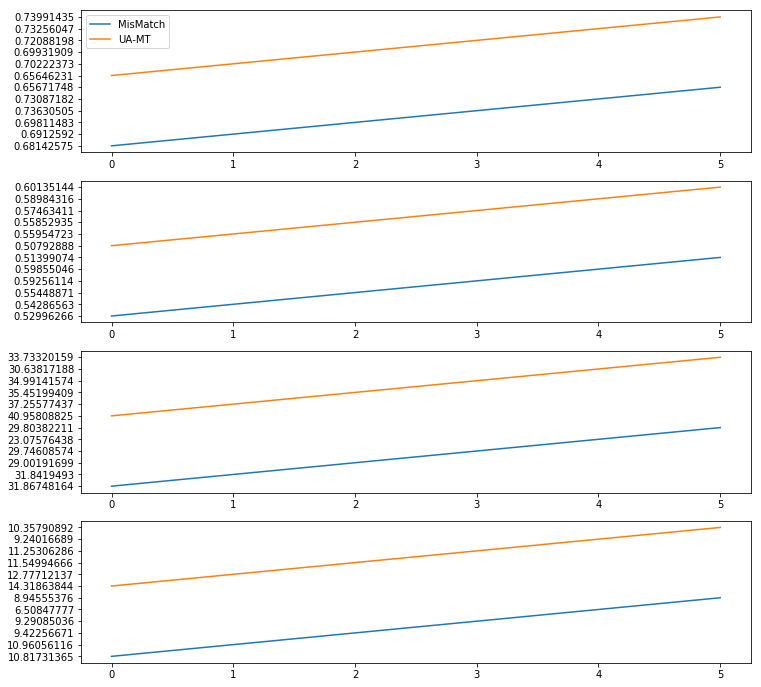

In [80]:
fig, axes = plt.subplots(4, figsize=(12,12))

x = np.arange(len([0.001, 0.01, 0.1, 1.0, 5.0, 10.0]))

for j in range(4):
    metrics = []
    for i, c in enumerate([0.001, 0.01, 0.1, 1.0, 5.0, 10.0]):
        current = re.findall("\d+\.\d+", l2_mismatch.get(c))
        metrics.append(current[j])
    axes[j].plot(x, metrics)
    metrics = []
    for i, c in enumerate([0.001, 0.01, 0.1, 1.0, 5.0, 10.0]):
        current = re.findall("\d+\.\d+", l2_uamt.get(c))
        metrics.append(current[j])
    axes[j].plot(x, metrics)

axes[0].legend(['MisMatch','UA-MT'])